<h2> Models to Predict Internet Traffic Data using Linear Regressions</h2>

<b> By Michael Kumakech</b>

In [2]:
import requests
import lxml.html as lh
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
# Code cell 3
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

<b> Grap data from the website</b>

In [5]:
internet_data = 'https://github.com/mkumakech/students/blob/main/internet_traffic_hist.csv' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(internet_data) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 row

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

<b> Check the table header</b>

In [6]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:
2:traffic
3:year


<b>Check the data in other rows</b>

In [7]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> To see the No of Rows and Columns</b>

In [8]:
[len(C) for (title,C) in col]

[11, 11, 11]

<b> Create a dataframe and read the file</b>

In [9]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [10]:
df.head()

,,traffic,year
0,,100.0,2005
1,,126.933755273,2006
2,,160.303756716,2007
3,,203.390603064,2008
4,,241.292565926,2009


In [11]:
df.tail()

,,traffic,year
6,,379.980658982,2011
7,,495.840568115,2012
8,,616.207252004,2013
9,,752.103482846,2014
10,,931.200928711,2015


In [12]:
df.shape

(11, 3)

In [13]:
df.describe()

,,traffic,year
count,11,11,11
unique,1,11,11
top,,160.303756716,2007
freq,11,1,1


In [14]:
df.dtypes

           object
traffic    object
year       object
dtype: object

<b> Convert the string to float</b>

In [17]:
df['traffic'] = df.traffic.astype(float)
df['year'] = df.year.astype(float)

df.head()

,,traffic,year
0,,100.000000,2005.0
1,,126.933755,2006.0
2,,160.303757,2007.0
3,,203.390603,2008.0
4,,241.292566,2009.0


In [19]:
df['traffic'] = df.traffic.astype(float)
df['year'] = df.year.astype(int)

df.head()

,,traffic,year
0,,100.000000,2005
1,,126.933755,2006
2,,160.303757,2007
3,,203.390603,2008
4,,241.292566,2009


In [20]:
df.describe()

,traffic,year
count,11.000000,11.000000
mean,392.367763,2010.000000
std,274.958904,3.316625
min,100.000000,2005.000000
25%,181.847180,2007.500000
50%,308.791823,2010.000000
75%,556.023910,2012.500000
max,931.200929,2015.000000


<b> Step 2: Visualize the internet volume traffic.</b>

In [21]:
dfc =df[['traffic','year']]
dfc.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


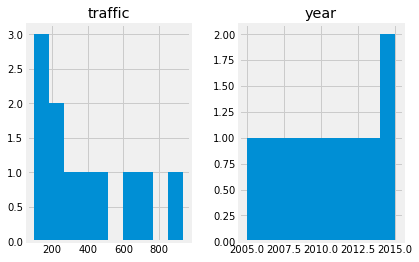

In [23]:
viz =dfc[['traffic','year']]
viz.hist()
plt.show()

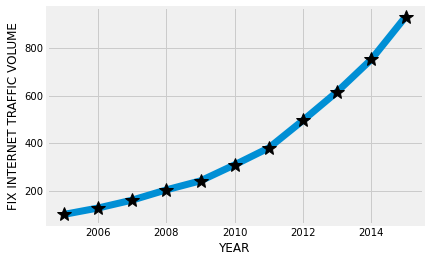

In [29]:
plt.scatter(dfc.year, dfc.traffic, color ='blue')
x = df.year
y = df.traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')
plt.xlabel('YEAR')
plt.ylabel('FIX INTERNET TRAFFIC VOLUME')
plt.show()

<h2> Step 1: Overlay a simple linear regression model over the Internet historical data.</h2>

The slope of line is 79.52710966244514.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244514x + -159457.12265833947.


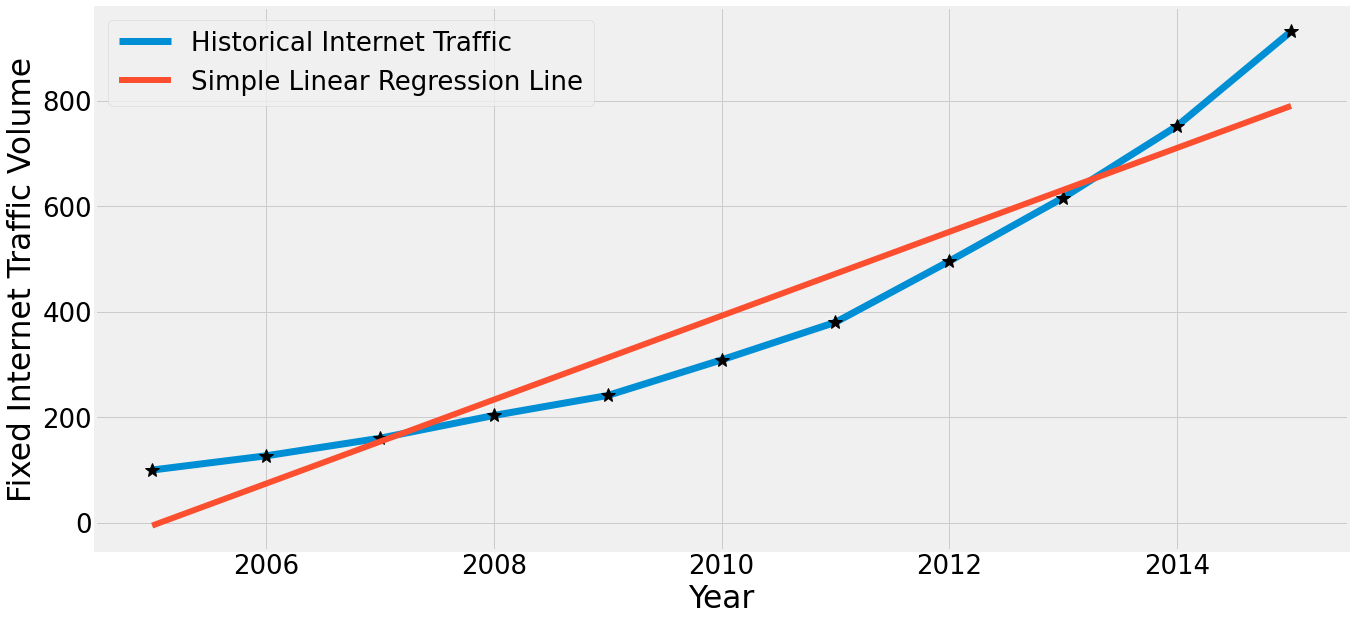

In [39]:
# Code cell 6
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = dfc.year
y = dfc.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
#plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

<h2> Part 4: Linear Regression: Higher Order Polynomials</h2>

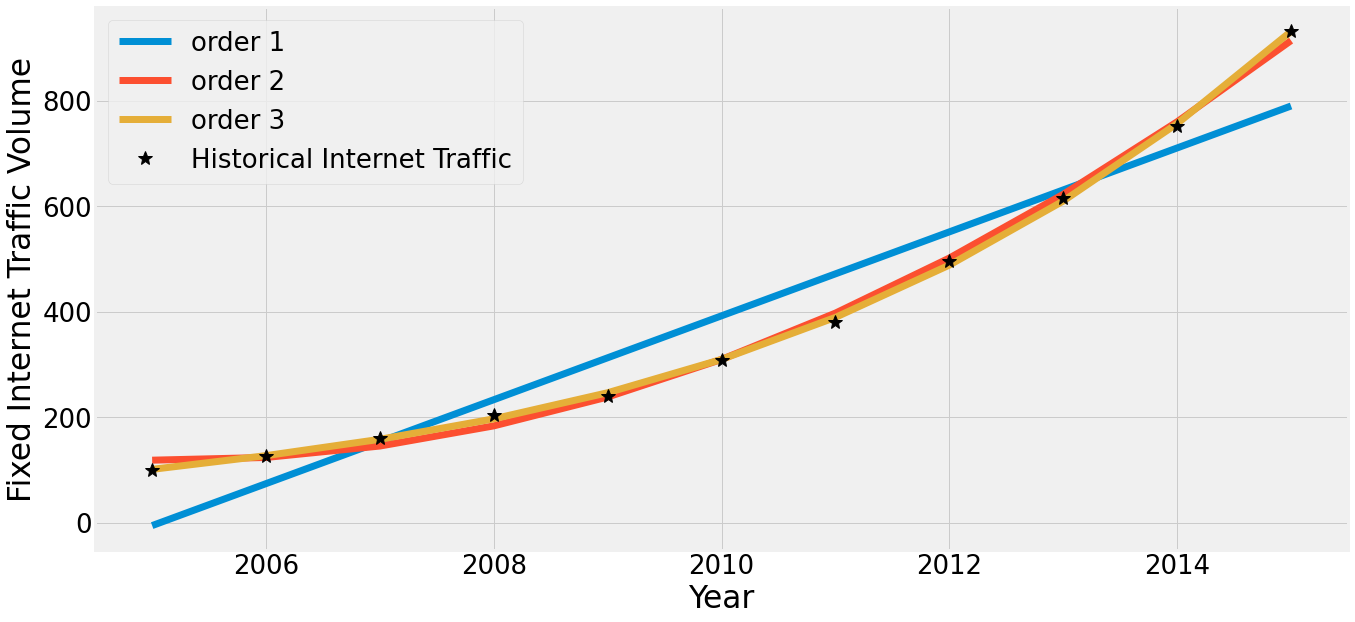

In [40]:
# Code cell 7
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

<h2> Part 5: Calculating the Errors</h2>

In [42]:
# Code cell 8
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(dfc) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

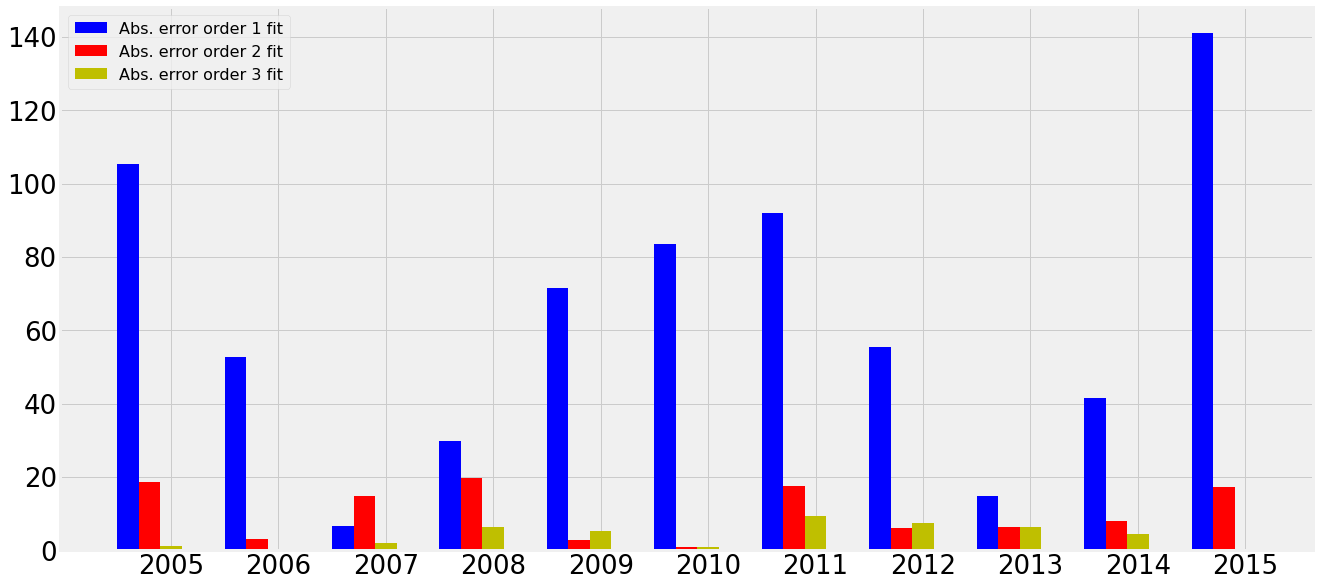

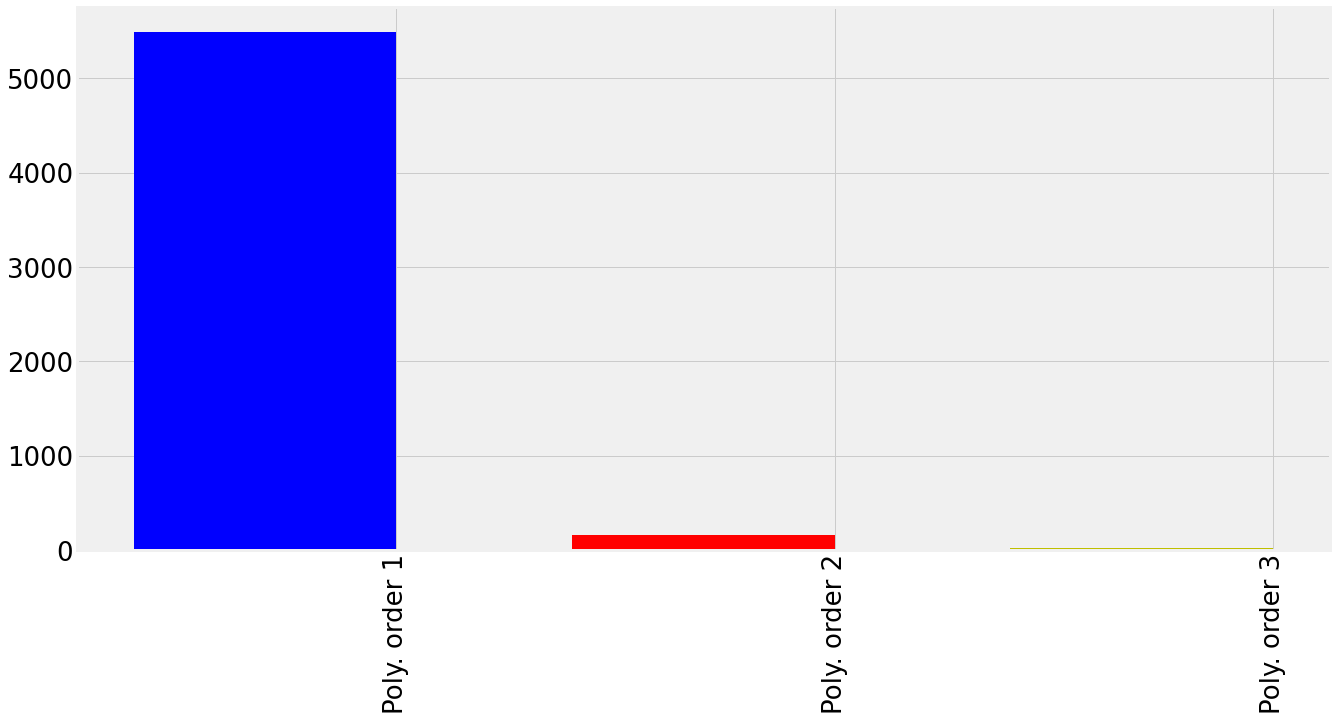

In [47]:
# Code cell 9
# Visualize fit error for each year

x = dfc.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

In [48]:
# Code cell 10
# Polynomial function order
order = 3

x = dfc.year.values      # regressor
y = dfc.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129399e-01 -2.90500575e+03  5.82252080e+06 -3.89005383e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.578447818756 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743074 0.39125407 2.0272255  6.32983065 5.28394498 0.93069849
 9.41692403 7.34009938 6.27729414 4.48134076 0.16291664]
The MSE is :25.172183997068604


<h2> Part 6: Non-Linear Regression Model: Exponential Growth</h2>

In [50]:
# Code cell 11
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = dfc.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(dfc)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820145   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820145  1.95659903  0.39475806  3.0341622   8.50876829  2.65664478
  8.32850905 11.70265948 12.59154094  0.47531785  7.10276496]
The MSE is :47.2361636667875


The true growth rate $r$ for the Internet traffic data was 0.22 and the initial value $a$ was 100. The estimated values for these paramters are $103.38$ and $1.2467 -1 = 0.25$. The discrepancy between those values is due to the unpredictable yearly variations. The curve_fit function estimates are off by $13 \%$ for $r$ and $3\%$ for $a$. Not bad!

<h2> Part 7: Comparing Models</h2>

Compare the errors and visualize the fit for the different regression models.

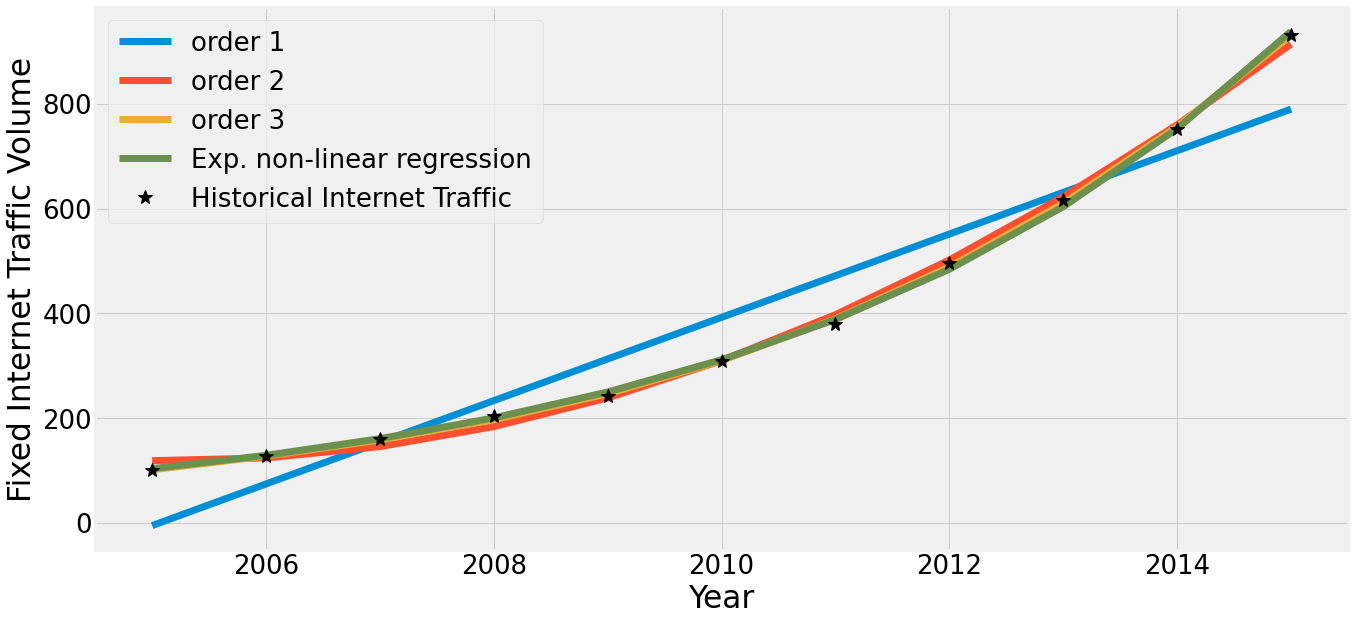

In [52]:
# Code cell 12
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = dfc.year.values      
    y = dfc.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(dfc.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(dfc.year, dfc.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible. Let's visualize the actual errors.

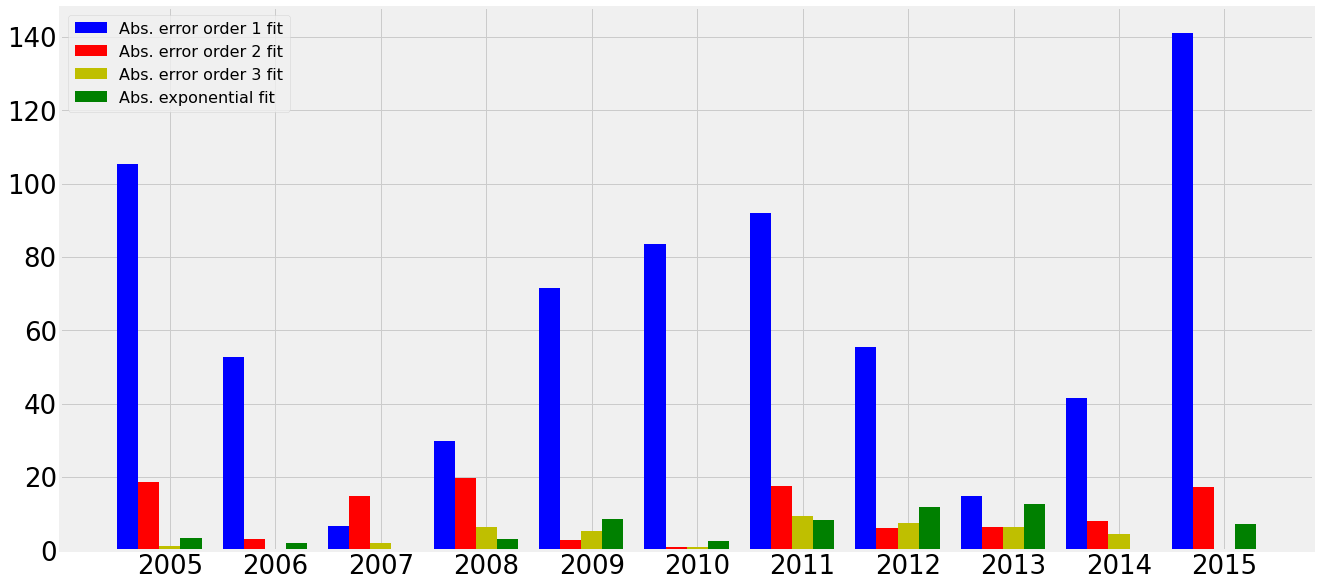

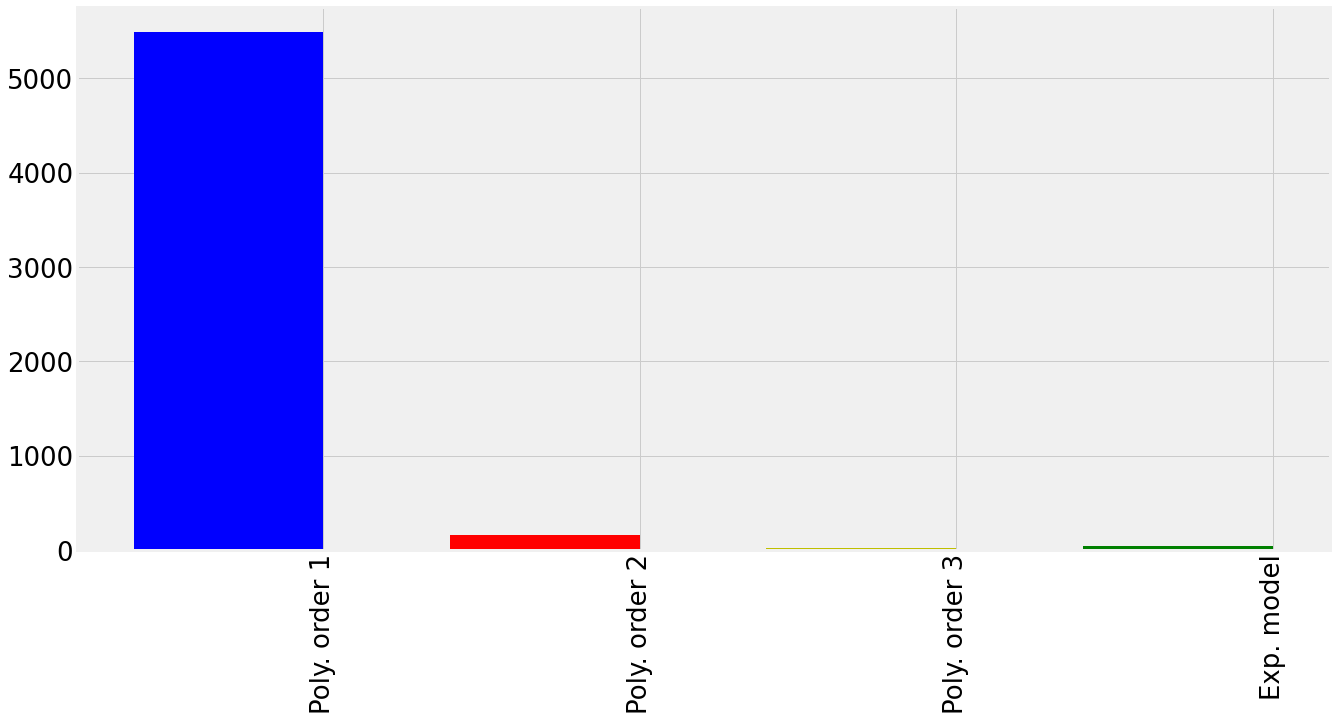

In [53]:
# Code cell 13
# Visualize fit error for each year

x = dfc.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

From the last plot, it seems that a third order polynomial, while not being the true model, fits better the traffic measurements in the observed range. But how well will this model generalize outside of this range (e.g., if we want to use this to make predictions about the future Internet traffic volume) ?

<h2> Part 8: Use Regression Model to Predict Future Values</h2>